In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 26s 6us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
from matplotlib.image import imread

In [8]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

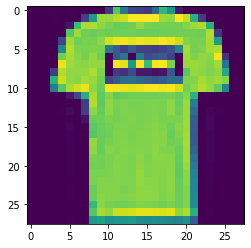

In [10]:
plt.imshow(X_train[1])

In [12]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [13]:
X_test.max()

255

In [15]:
X_test = X_test/255
X_train = X_train/255

In [16]:
len(X_train)

60000

In [17]:
len(X_test)

10000

In [18]:
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.reshape(60000, 28, 28, 1)

In [19]:
from tensorflow.keras.utils import to_categorical

In [20]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [22]:
X_test.shape

(10000, 28, 28, 1)

In [23]:
X_train.shape

(60000, 28, 28, 1)

In [25]:
y_cat_test.shape

(10000, 10)

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten

In [56]:
model = Sequential()
model.add(Conv2D(filters=32 , kernel_size=(4,4), input_shape = (28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam', metrics = ['accuracy'])

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
early = EarlyStopping(monitor='val_loss', patience=2)

In [59]:
model.fit(x = X_train, y= y_cat_train, epochs = 12, validation_data=(X_test, y_cat_test), callbacks = [early])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 268s 4ms/sample - loss: 0.8916 - accuracy: 0.6821 - val_loss: 0.6515 - val_accuracy: 0.7555
Epoch 2/12
60000/60000 [==============================] - 273s 5ms/sample - loss: 0.5947 - accuracy: 0.7775 - val_loss: 0.5938 - val_accuracy: 0.7795
Epoch 3/12
60000/60000 [==============================] - 270s 5ms/sample - loss: 0.5396 - accuracy: 0.7998 - val_loss: 0.5546 - val_accuracy: 0.7982
Epoch 4/12
60000/60000 [==============================] - 273s 5ms/sample - loss: 0.5027 - accuracy: 0.8175 - val_loss: 0.5317 - val_accuracy: 0.8087
Epoch 5/12
60000/60000 [==============================] - 270s 5ms/sample - loss: 0.4724 - accuracy: 0.8308 - val_loss: 0.4996 - val_accuracy: 0.8189
Epoch 6/12
60000/60000 [==============================] - 278s 5ms/sample - loss: 0.4519 - accuracy: 0.8391 - val_loss: 0.4677 - val_accuracy: 0.8341
Epoch 7/12
60000/60000 [==========================

In [60]:
loss = pd.DataFrame(model.history.history)

In [61]:
loss

,loss,accuracy,val_loss,val_accuracy
0,0.891650,0.682133,0.651455,0.7555
1,0.594708,0.777500,0.593772,0.7795
2,0.539603,0.799850,0.554553,0.7982
3,0.502724,0.817483,0.531716,0.8087
4,0.472425,0.830817,0.499613,0.8189
5,0.451852,0.839117,0.467710,0.8341
6,0.434098,0.845183,0.461777,0.8368
7,0.423749,0.849467,0.453131,0.8399
8,0.411791,0.852167,0.432269,0.8467
9,0.403330,0.854983,0.423812,0.8514


<AxesSubplot:>

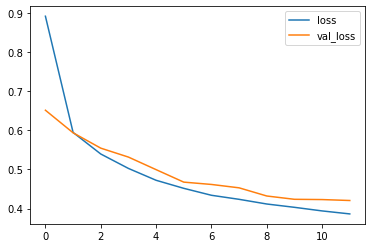

In [62]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

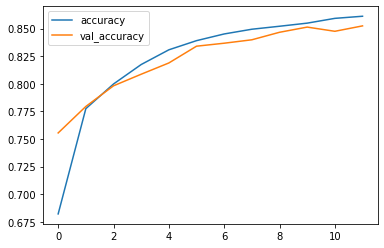

In [63]:
loss[['accuracy', 'val_accuracy']].plot()

In [64]:
predd = model.predict_classes(X_test)

In [65]:
y_cat_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [66]:
predd

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [67]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
print(confusion_matrix(y_test, predd))

[[772   0  28  52   4   2 127   0  15   0]
 [  3 953   4  32   3   0   3   0   2   0]
 [  8   0 773  16 143   1  50   0   9   0]
 [ 20   9  19 886  35   0  26   0   5   0]
 [  1   0 101  31 803   0  58   0   6   0]
 [  0   0   0   1   0 910   0  68   2  19]
 [129   0 109  34 133   0 571   0  24   0]
 [  0   0   0   0   0  10   0 973   0  17]
 [  0   0  11   5   5   3   5   6 965   0]
 [  0   0   0   1   0   7   2  71   0 919]]


In [70]:
print(classification_report(y_test, predd))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.74      0.77      0.76      1000
           3       0.84      0.89      0.86      1000
           4       0.71      0.80      0.76      1000
           5       0.98      0.91      0.94      1000
           6       0.68      0.57      0.62      1000
           7       0.87      0.97      0.92      1000
           8       0.94      0.96      0.95      1000
           9       0.96      0.92      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



<AxesSubplot:>

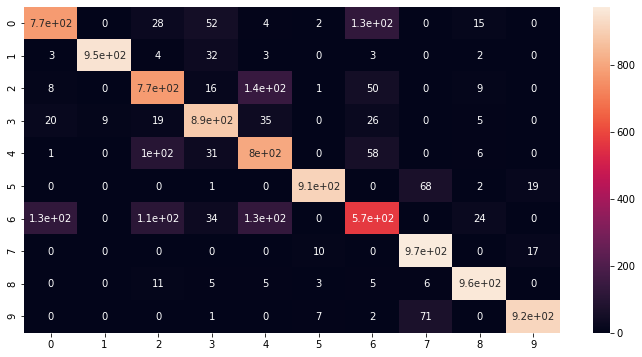

In [71]:
plt.figure(figsize = (12,6))
sns.heatmap(confusion_matrix(y_test, predd), annot = True)

# lets try to predd new image

In [72]:
new_image = X_test[12].reshape(1,28,28,1)

In [73]:
model.predict_classes(new_image)

array([7], dtype=int64)